In [2]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
cells = 10000
tmg_concentration = 25
file_on = f'../simulation_data/gillespie_on_off/gillespie_on_off_state_on_tmg_{tmg_concentration}_cells_{cells}.csv'
file_off = f'../simulation_data/gillespie_on_off/gillespie_on_off_state_off_tmg_{tmg_concentration}_cells_{cells}.csv'

data_on = pd.read_csv(file_on, delimiter='|')
data_off = pd.read_csv(file_off, delimiter='|')

In [4]:
k_off = 1/np.mean(data_off.On_Time)
k_on = 1/np.mean(data_on.Off_Time)
x = np.linspace(0,30000,100)

In [5]:
switch_off = r'$\tau_{off}/\tau_d$', 
switch_on = r'$\tau_{on}/\tau_d$'

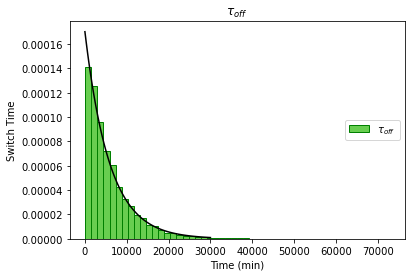

In [6]:
plt.plot(x,k_on*np.exp(-k_on*x), color='k')
plt.hist(data_on.Off_Time,bins=50,color='#68ce50',label=r'$\tau_{off}$',density=True, edgecolor='g');
plt.title(r'$\tau_{off}$')
plt.xlabel('Time (min)')
plt.ylabel('Switch Time')
# plt.yscale('log')
plt.legend(loc=7)

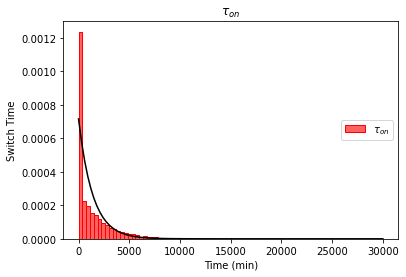

In [7]:
plt.plot(x,k_off*np.exp(-k_off*x), color='k')
plt.hist(data_off.On_Time, bins=50,color='#ff6060',label=r'$\tau_{on}$', density=True, edgecolor='r');
plt.title(r'$\tau_{on}$')
plt.xlabel('Time (min)')
plt.ylabel('Switch Time')
# plt.yscale('log')
plt.legend(loc=7)

In [8]:

mean_arr_on = []
mean_arr_off = []

cv_2arr_on = []
cv_2arr_off = []

complete_stat_on = []
complete_stat_off = []

tmg_arr = [i*5 for i in range(1,9)]

gamma = 0.0231

for tmg_concentration in range(1,9):
    cells = 10000
    file_on = f'../simulation_data/gillespie_on_off/gillespie_on_off_state_on_tmg_{tmg_concentration*5}_cells_{cells}.csv'
    file_off = f'../simulation_data/gillespie_on_off/gillespie_on_off_state_off_tmg_{tmg_concentration*5}_cells_{cells}.csv'
    data_on = pd.read_csv(file_on, delimiter='|')
    data_off = pd.read_csv(file_off, delimiter='|')

    mean_on = np.mean(data_on.Off_Time) * 0.0231
    cv2_on = np.var(data_on.Off_Time)/np.mean(data_on.Off_Time)**2
    com_stat_on = stats.bayes_mvs(data_on.Off_Time, alpha=0.95)[1]
    
    mean_arr_on.append(mean_on) 
    cv_2arr_on.append(cv2_on)
    complete_stat_on.append(com_stat_on)

    mean_off =  np.mean(data_off.On_Time) * 0.0231
    cv2_off = np.var(data_off.On_Time)/np.mean(data_off.On_Time)**2
    com_stat_off = stats.bayes_mvs(data_off.On_Time, alpha=0.95)[1]

    mean_arr_off.append(mean_off) 
    cv_2arr_off.append(cv2_off)
    complete_stat_off.append(com_stat_off)

(0.0, 15.108853182235883)

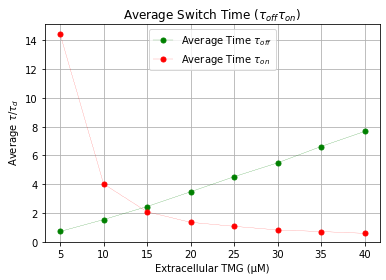

In [9]:
mean_arr_on = np.array(mean_arr_on)
mean_arr_off = np.array(mean_arr_off)

plt.plot(tmg_arr,mean_arr_on/(np.log(2)/gamma), 'g-o', label=r'Average Time $\tau_{off}$', ms= 5, lw=0.2)
plt.plot(tmg_arr, mean_arr_off/(np.log(2)/gamma), 'r--o', label=r'Average Time $\tau_{on}$', ms = 5,lw=0.2)

plt.title(r'Average Switch Time ($\tau_{off} \tau_{on}$)')
plt.xlabel('Extracellular TMG (µM)')

plt.ylabel(r' Average $\tau/\tau_d$')
plt.legend(loc=9, fontsize=10)
plt.grid(True)
plt.ylim(0)

In [10]:
# mean_cntr, var_cntr, std_cntr = stats.bayes_mvs(datos,alpha=0.95)

# errv=((var_cntr[1][1] - var_cntr[0])/mean_cntr[0]**2) + (2*(mean_cntr[1][1] - mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3)


In [11]:
mean_arr_on = []
mean_arr_off = []

var_arr_on = []
var_arr_off = []

std_arr_on = []
std_arr_off = []

err_arr_on = []
err_arr_off = []

tmg_arr = [i*5 for i in range(1,9)]

gamma = 0.0231

for tmg_concentration in range(1,9):
    cells = 10000
    file_on = f'../simulation_data/gillespie_on_off/gillespie_on_off_state_on_tmg_{tmg_concentration*5}_cells_{cells}.csv'
    file_off = f'../simulation_data/gillespie_on_off/gillespie_on_off_state_off_tmg_{tmg_concentration*5}_cells_{cells}.csv'
    data_on = pd.read_csv(file_on, delimiter='|')
    data_off = pd.read_csv(file_off, delimiter='|')
    
    mean_cntr_on, var_cntr_on, std_cntr_on = stats.bayes_mvs(data_on.Off_Time,alpha=0.95)

    errv_on=((var_cntr_on[1][1] - var_cntr_on[0])/mean_cntr_on[0]**2) + \
            (2*(mean_cntr_on[1][1] - mean_cntr_on[0])*var_cntr_on[0]/mean_cntr_on[0]**3)
    
    mean_cntr_off, var_cntr_off, std_cntr_off = stats.bayes_mvs(data_off.On_Time,alpha=0.95)

    errv_off=((var_cntr_off[1][1] - var_cntr_off[0])/mean_cntr_off[0]**2) + \
             (2*(mean_cntr_off[1][1] - mean_cntr_off[0])*var_cntr_off[0]/mean_cntr_off[0]**3)

    mean_arr_on.append(mean_cntr_on[0])
    mean_arr_off.append(mean_cntr_off[0])

    var_arr_on.append(var_cntr_on[0])
    var_arr_off.append(var_cntr_off[0])

    std_arr_on.append(std_cntr_on[0])
    std_arr_off.append(std_cntr_off[0])

    err_arr_on.append(errv_on)
    err_arr_off.append(errv_off)


In [12]:
cv2_on_arr = np.array([(var_arr_on[i]/pow(mean_arr_on[i], 2)) for i in range(len(mean_arr_off))])
cv2_off_arr = np.array([(var_arr_off[i]/pow(mean_arr_off[i], 2)) for i in range(len(mean_arr_off))])

low_lim_off = np.array([cv2_off_arr[i] - err_arr_off[i] for i in range(len(err_arr_off))])
upper_lim_off = np.array([cv2_off_arr[i] + err_arr_off[i] for i in range(len(err_arr_off))])

low_lim_on = np.array([cv2_on_arr[i] - err_arr_on[i] for i in range(len(err_arr_off))])
upper_lim_on = np.array([cv2_on_arr[i] + err_arr_on[i] for i in range(len(err_arr_off))])

Text(0, 0.5, '$C_V^2$')

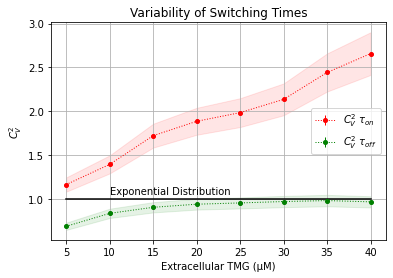

In [13]:
#/(np.log(2)/gamma)
plt.errorbar(tmg_arr, cv2_off_arr, yerr=err_arr_off/(np.log(2)/gamma), color='red', lw=1, fmt='o', ms=4, linestyle='dotted', label=r'$C_V^2$ $\tau_{on}$')

plt.errorbar(tmg_arr, cv2_on_arr, yerr=err_arr_on/(np.log(2)/gamma), color='green', lw=1, fmt='o', ms=4, linestyle='dotted', label= r'$C_V^2$ $\tau_{off}$')

plt.fill_between(tmg_arr,upper_lim_off, low_lim_off, color='red', alpha=0.1)
plt.fill_between(tmg_arr,upper_lim_on, low_lim_on, color='green', alpha=0.1)

plt.legend(loc=7, fontsize=10)

plt.grid(True)
x = [5,40]
y = [1,1]
plt.plot(x,y,'k')
plt.text(10,1.05,'Exponential Distribution')
plt.title('Variability of Switching Times')
plt.xlabel('Extracellular TMG (µM)')
plt.ylabel(r'$C_V^2$')

In [14]:
#Double Switch
factor = 5

corr_arr_on = []
corr_arr_off = []

for tmg_concentration in range(1,9):
    f_on = f'../simulation_data/gillespie_on_off_double/gillespie_on_off_double_state_on_tmg_{tmg_concentration*5}_cells_10000.csv'
    f_off = f'../simulation_data/gillespie_on_off_double/gillespie_on_off_double_state_off_tmg_{tmg_concentration*5}_cells_10000.csv'

    df_on = pd.read_csv(f_on, delimiter='|')
    df_off = pd.read_csv(f_off, delimiter='|')

    df_on_offtime = np.array(df_on.Off_Time[df_on.Off_Time != 'None'])
    df_on_ontime = np.array(df_on.On_Time[df_on.On_Time != 'None'])

    df_off_offtime = np.array(df_off.Off_Time[df_off.Off_Time != 'None'])
    df_off_ontime = np.array(df_off.On_Time[df_off.On_Time != 'None'])

    df_on_offtime_fixed = [float(df_on_offtime[i]) for i in range(len(df_on_offtime))]
    df_on_ontime_fixed = [float(df_on_ontime[i]) - float(df_on_offtime[i]) for i in range(len(df_on_ontime))]

    df_off_ontime_fixed = [float(df_off_ontime[i]) for i in range(len(df_off_ontime))]
    df_off_offtime_fixed = [float(df_off_offtime[i]) - float(df_off_ontime[i]) for i in range(len(df_off_offtime))]
    
    

    r_corr_on = np.corrcoef(df_on_ontime_fixed, df_on_offtime_fixed)[0][1]
    r_corr_off = np.corrcoef(df_off_ontime_fixed, df_off_offtime_fixed)[0][1]

    corr_arr_on.append(r_corr_on)
    corr_arr_off.append(r_corr_off)

(-1.0, 1.0)

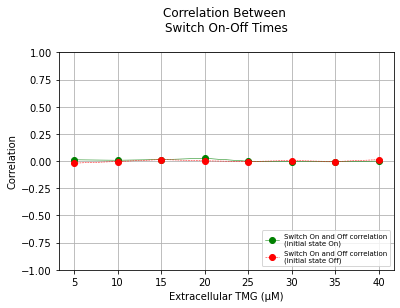

In [15]:
plt.plot(tmg_arr,corr_arr_on, 'g-o',lw=0.5, label='Switch On and Off correlation\n(initial state On)')
plt.plot(tmg_arr, corr_arr_off, 'r--o',lw=0.5, label='Switch On and Off correlation\n(initial state Off)')
plt.legend(loc=4, fontsize=7)
plt.grid(True)
plt.title('Correlation Between \nSwitch On-Off Times\n')
plt.xlabel('Extracellular TMG (µM)')
plt.ylabel('Correlation')
plt.ylim(-1,1)
#plt.yscale('log')

In [16]:
tmg_arr_3 = [10,20,30]

data_arr_on = []        # Off - On
data_arr_off = []       # Off - On

for tmg_concentration in tmg_arr_3:
    f_on_2 = f'../simulation_data/gillespie_on_off_double/gillespie_on_off_double_state_on_tmg_{tmg_concentration}_cells_10000.csv'
    f_off_2 = f'../simulation_data/gillespie_on_off_double/gillespie_on_off_double_state_off_tmg_{tmg_concentration}_cells_10000.csv'

    df_on_2 = pd.read_csv(f_on_2, delimiter='|')
    df_off_2 = pd.read_csv(f_off_2, delimiter='|')



    df_on_offtime_2 = [float(np.array(df_on_2.Off_Time[df_on_2.Off_Time != 'None'])[i]) \
        for i in range(len(df_on_2.Off_Time[df_on_2.Off_Time != 'None']))]

    df_on_ontime_2 = [float(np.array(df_on_2.On_Time[df_on_2.On_Time != 'None'])[i]) - float(np.array(df_on_2.Off_Time[df_on_2.Off_Time != 'None'])[i]) \
        for i in range(len(df_on_2.On_Time[df_on.On_Time != 'None']))]


    df_off_ontime_2 = [float(np.array(df_off_2.On_Time[df_off_2.On_Time != 'None'])[i])\
        for i in range(len(df_off_2.On_Time[df_off_2.On_Time != 'None']))]

    df_off_offtime_2 = [float(np.array(df_off_2.Off_Time[df_off_2.Off_Time != 'None'])[i]) - float(np.array(df_off_2.On_Time[df_off_2.On_Time != 'None'])[i])\
        for i in range(len(df_off_2.Off_Time[df_off_2.Off_Time != 'None']))]


    data_arr_on.append([df_on_offtime_2, df_on_ontime_2])
    data_arr_off.append([df_off_offtime_2, df_off_ontime_2])

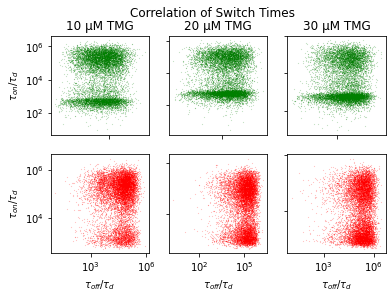

In [17]:
switch_off = r'$\tau_{off}/\tau_d$', 
switch_on = r'$\tau_{on}/\tau_d$'

grow_time = np.log(2)/30
fig, ((ax1, ax3, ax5) , (ax2, ax4, ax6)) = plt.subplots(2, 3)
fig.suptitle('Correlation of Switch Times')

ax1.plot(data_arr_on[0][0]/grow_time,data_arr_on[0][1]/grow_time, 'ko', ms=0.08, color='green')
ax1.set(xlabel=r'$\tau_{off}/\tau_d$')
ax1.set(ylabel=r'$\tau_{on}/\tau_d$')
ax1.set_title('10 µM TMG')

ax2.plot(data_arr_off[0][0]/grow_time, data_arr_off[0][1]/grow_time, 'ko', ms=0.08, color='red')
ax2.set(xlabel=r'$\tau_{off}/\tau_d$')
ax2.set(ylabel=r'$\tau_{on}/\tau_d$')

ax3.plot(data_arr_on[1][0]/grow_time, data_arr_on[1][1]/grow_time, 'ko', ms=0.08, color='green')
ax3.set(xlabel=r'$\tau_{off}/\tau_d$')
ax3.set(ylabel=r'$\tau_{on}/\tau_d$')
ax3.set_title('20 µM TMG')
#______________________________

ax4.plot(data_arr_off[1][0]/grow_time, data_arr_off[1][1]/grow_time, 'ko', ms=0.08, color='red')
ax4.set(xlabel=r'$\tau_{off}/\tau_d$')
ax4.set(ylabel=r'$\tau_{on}/\tau_d$')

ax5.plot(data_arr_on[2][0]/grow_time, data_arr_on[2][1]/grow_time, 'ko', ms=0.08, color='green')
ax5.set(xlabel=r'$\tau_{off}/\tau_d$')
ax5.set(ylabel=r'$\tau_{on}/\tau_d$')
ax5.set_title('30 µM TMG')

ax6.plot(data_arr_off[2][0]/grow_time, data_arr_off[2][1]/grow_time, 'ko', ms=0.08, color='red')
ax6.set(xlabel=r'$\tau_{off}/\tau_d$')
ax6.set(ylabel=r'$\tau_{on}/\tau_d$')

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xscale('log')
    ax.set_yscale('log')


C:\Users\sap98\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


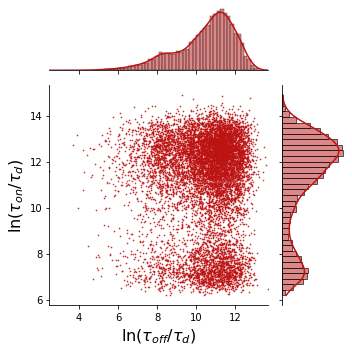

In [41]:
import seaborn as sns

#sns.jointplot(np.log(data_arr_on[0][0]/grow_time),np.log(data_arr_on[0][1]/grow_time), kind='kde')

ax = sns.jointplot(np.log(data_arr_off[0][0]/grow_time),np.log(data_arr_off[0][1]/grow_time),scatter_kws={"color": "#BD1212",'s':0.5},\
 line_kws={"color": "#FFFFFF", 'lw':0},ratio=3, color="#BD1212", height=5, kind='reg')

ax.set_axis_labels(r'$\ln(\tau_{off}/\tau_d)$', r'$\ln(\tau_{on}/\tau_d)$', fontsize=16)
#ax.plot_joint(sns.kdeplot, color="k", zorder=0, levels=6)
plt.tight_layout()

C:\Users\sap98\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


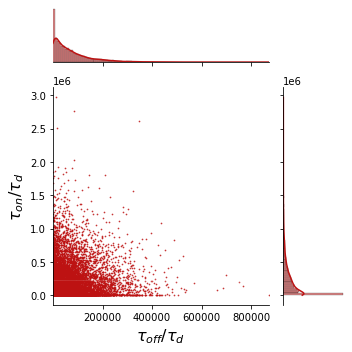

In [44]:
ax = sns.jointplot(data_arr_off[0][0]/grow_time,data_arr_off[0][1]/grow_time,scatter_kws={"color": "#BD1212",'s':0.5},\
 line_kws={"color": "#FFFFFF", 'lw':0},ratio=3, color="#BD1212", height=5, kind='reg')

ax.set_axis_labels(r'$\tau_{off}/\tau_d$', r'$\tau_{on}/\tau_d$', fontsize=16)
plt.tight_layout()

C:\Users\sap98\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


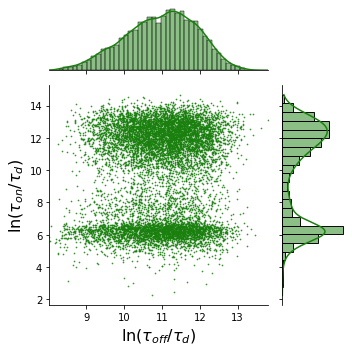

In [42]:
import seaborn as sns

#sns.jointplot(np.log(data_arr_on[0][0]/grow_time),np.log(data_arr_on[0][1]/grow_time), kind='kde')

ax = sns.jointplot(np.log(data_arr_on[0][0]/grow_time),np.log(data_arr_on[0][1]/grow_time),scatter_kws={"color": "#19800E",'s':0.5},\
 line_kws={"color": "#FFFFFF", 'lw':0},ratio=3, color="#19800E", height=5, kind='reg')

ax.set_axis_labels(r'$\ln(\tau_{off}/\tau_d)$', r'$\ln(\tau_{on}/\tau_d)$', fontsize=16)
#ax.plot_joint(sns.kdeplot, color="k", zorder=0, levels=6)
plt.tight_layout()

C:\Users\sap98\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


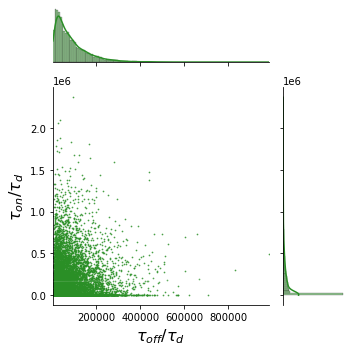

In [20]:
ax = sns.jointplot(data_arr_on[0][0]/grow_time,data_arr_on[0][1]/grow_time,scatter_kws={"color": "#2A8F26",'s':0.5},\
 line_kws={"color": "#FFFFFF", 'lw':0},ratio=3, color="#2A8F26", height=5, kind='reg')

ax.set_axis_labels(r'$\tau_{off}/\tau_d$', r'$\tau_{on}/\tau_d$', fontsize=16)
plt.tight_layout()

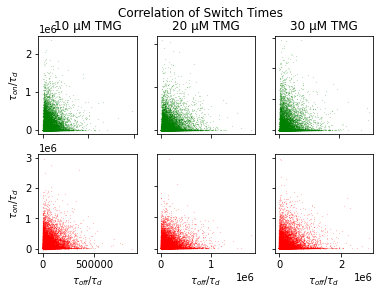

In [21]:
switch_off = r'$\tau_{off}/\tau_d$', 
switch_on = r'$\tau_{on}/\tau_d$'

grow_time = np.log(2)/30
fig, ((ax1, ax3, ax5) , (ax2, ax4, ax6)) = plt.subplots(2, 3)
fig.suptitle('Correlation of Switch Times')

ax1.plot(data_arr_on[0][0]/grow_time,data_arr_on[0][1]/grow_time, 'ko', ms=0.08, color='green')
ax1.set(xlabel=r'$\tau_{off}/\tau_d$')
ax1.set(ylabel=r'$\tau_{on}/\tau_d$')
ax1.set_title('10 µM TMG')

ax2.plot(data_arr_off[0][0]/grow_time, data_arr_off[0][1]/grow_time, 'ko', ms=0.08, color='red')
ax2.set(xlabel=r'$\tau_{off}/\tau_d$')
ax2.set(ylabel=r'$\tau_{on}/\tau_d$')

ax3.plot(data_arr_on[1][0]/grow_time, data_arr_on[1][1]/grow_time, 'ko', ms=0.08, color='green')
ax3.set(xlabel=r'$\tau_{off}/\tau_d$')
ax3.set(ylabel=r'$\tau_{on}/\tau_d$')
ax3.set_title('20 µM TMG')
#______________________________

ax4.plot(data_arr_off[1][0]/grow_time, data_arr_off[1][1]/grow_time, 'ko', ms=0.08, color='red')
ax4.set(xlabel=r'$\tau_{off}/\tau_d$')
ax4.set(ylabel=r'$\tau_{on}/\tau_d$')

ax5.plot(data_arr_on[2][0]/grow_time, data_arr_on[2][1]/grow_time, 'ko', ms=0.08, color='green')
ax5.set(xlabel=r'$\tau_{off}/\tau_d$')
ax5.set(ylabel=r'$\tau_{on}/\tau_d$')
ax5.set_title('30 µM TMG')

ax6.plot(data_arr_off[2][0]/grow_time, data_arr_off[2][1]/grow_time, 'ko', ms=0.08, color='red')
ax6.set(xlabel=r'$\tau_{off}/\tau_d$')
ax6.set(ylabel=r'$\tau_{on}/\tau_d$')

for ax in fig.get_axes():
    ax.label_outer()


In [22]:
tmg = 25
f_on = f'../simulation_data/gillespie_on_off_double/gillespie_on_off_double_state_on_tmg_{tmg}_cells_10000.csv'
f_off = f'../simulation_data/gillespie_on_off_double/gillespie_on_off_double_state_off_tmg_{tmg}_cells_10000.csv'

df_on = pd.read_csv(f_on, delimiter='|')
df_off = pd.read_csv(f_off, delimiter='|')

switchon_on = [float(np.array(df_on.On_Time[df_on.On_Time != 'None'])[i]) for i in range(len(df_on.On_Time[df_on.On_Time != 'None']))]
switchoff_on = [float(np.array(df_on.Off_Time[df_on.Off_Time != 'None'])[i]) for i in range(len(df_on.Off_Time[df_on.Off_Time != 'None']))]

switchon_off = [float(np.array(df_off.On_Time[df_off.On_Time != 'None'])[i]) for i in range(len(df_off.On_Time[df_off.On_Time != 'None']))]
switchoff_off = [float(np.array(df_off.Off_Time[df_off.Off_Time != 'None'])[i]) for i in range(len(df_off.Off_Time[df_off.Off_Time != 'None']))]


Text(0.5, 0, 'Time (min)')

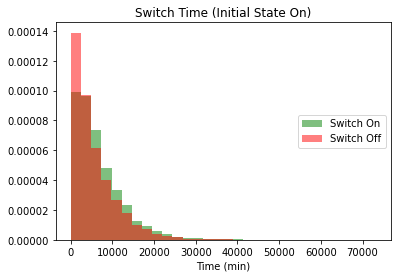

In [23]:
plt.hist(switchon_on, bins=30, color='green', density=True, alpha=0.5, label='Switch On');
plt.hist(switchoff_on, bins=30, color='red', density=True, alpha=0.5, label='Switch Off');
plt.legend(loc=7, fontsize=10)
plt.title('Switch Time (Initial State On)')
plt.xlabel('Time (min)')

Text(0.5, 0, 'Time (min)')

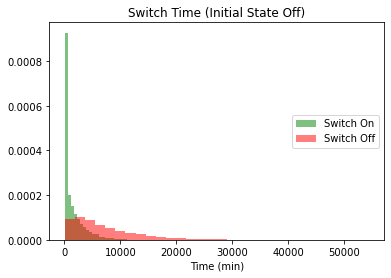

In [24]:
plt.hist(switchon_off, bins=30, color='green', density=True, alpha=0.5, label='Switch On');
plt.hist(switchoff_off, bins=30, color='red', density=True, alpha=0.5, label='Switch Off');
plt.legend(loc=7, fontsize=10)
plt.title('Switch Time (Initial State Off)')
plt.xlabel('Time (min)')

In [25]:
clave = [3,1,1,4,7,3,8,4,6,4]
clave[::-1]

[4, 6, 4, 8, 3, 7, 4, 1, 1, 3]